In [1]:
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import  make_pipeline

# Pickle for saving model files
import pickle

# For standardization
from sklearn.preprocessing  import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data = data.drop(['Id','BUTTER'],axis=1)

In [4]:
y = data['signal']
X = data.drop(['signal'],axis=1)

In [5]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size = 0.25,
                                                     random_state = 1234, 
                                                     stratify = data['signal'])
# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

159496 53166
159496 53166


In [6]:
#Load
with open('model_gb_finalNoButter.pkl', 'rb') as f:
    modelGB = pickle.load(f)

In [7]:
#Load
with open('model_rf_finalNoButter.pkl', 'rb') as f:
    modelRF = pickle.load(f)

In [8]:
modelRF
print(modelRF)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.33, n_estimators=300,
                                        random_state=123))])


In [9]:
estimators = [('rf',RandomForestClassifier(n_estimators=300, random_state=123,max_features=0.33,verbose=True)),
              ('gb',GradientBoostingClassifier(max_depth=5,n_estimators=300,random_state=123,verbose=True)),
             ('MLP',MLPClassifier(activation='tanh', alpha=0.001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(100, 100, 100, 100, 100),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=500, momentum=0.9, n_iter_no_change=5,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1997, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=True, warm_start=False))]

In [10]:
clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(),
                         cv=5,
                         n_jobs=2,
                         verbose=True
                        )

In [11]:
clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_features=0.33,
                                                       n_estimators=300,
                                                       random_state=123,
                                                       verbose=True)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=300,
                                                           random_state=123,
                                                           verbose=True)),
                               ('MLP',
                                MLPClassifier(activation='tanh', alpha=0.001,
                                              early_stopping=True,
                                              hidden_layer_sizes=(100, 100, 100,
                                          

In [12]:
#Predict PROBABILITIES
pred = clf.predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.5s finished


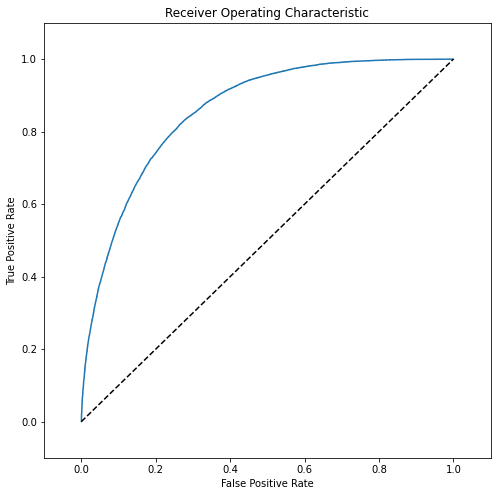

In [13]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--')

# Axes limits and labels
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:

pred = clf.predict_proba(X_test)
pred = [p[1] for p in pred]
fpr, tpr, thresholds = roc_curve(y_test, pred)
print("CLF", auc(fpr, tpr))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.4s finished


CLF 0.8586996307157528


In [16]:
test = pd.read_csv('test.csv')

In [17]:
test =test.drop(['Id','BUTTER'],axis=1)

In [18]:
clf.fit(X,y)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_features=0.33,
                                                       n_estimators=300,
                                                       random_state=123,
                                                       verbose=True)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=300,
                                                           random_state=123,
                                                           verbose=True)),
                               ('MLP',
                                MLPClassifier(activation='tanh', alpha=0.001,
                                              early_stopping=True,
                                              hidden_layer_sizes=(100, 100, 100,
                                          

In [21]:
a = clf.predict_proba(test)
print(a.shape)
df = pd.DataFrame({'Predicted':a[:,1]})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   10.8s finished


(141776, 2)


In [22]:
df.to_csv("StackingClass.csv",index=True)

In [ ]:
#CV con StackingClassifier
#Quitar features
#importancia features

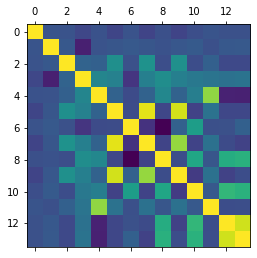

In [26]:
plt.matshow(pd.DataFrame(X_train).corr())
plt.show()

In [28]:
data.columns

Index(['                   B_OWNPV_CHI2 ', '                 B_IPCHI2_OWNPV ',
       '                 B_FDCHI2_OWNPV ', '                   B_DIRA_OWNPV ',
       '                           B_PT ', '             Kst_892_0_IP_OWNPV ',
       '            Kst_892_0_cosThetaH ', '                 Kplus_IP_OWNPV ',
       '                        Kplus_P ', '               piminus_IP_OWNPV ',
       '                      piminus_P ', '                       gamma_PT ',
       '                    piminus_ETA ', '                      Kplus_ETA ',
       'signal'],
      dtype='object')

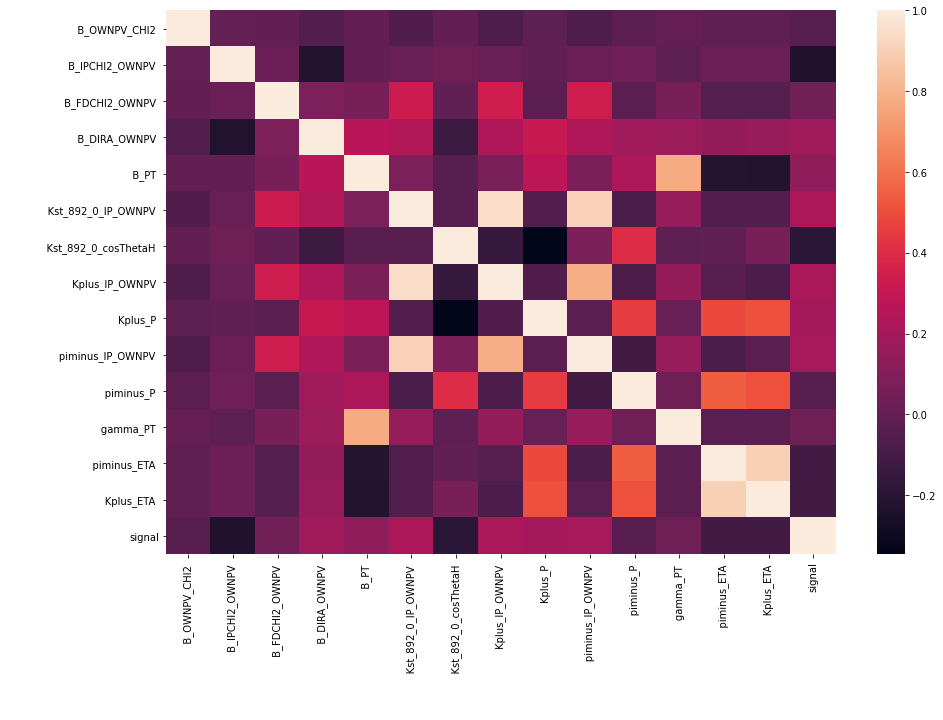

In [32]:
data_correlation = data.corr()
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

In [34]:
for i in range(X_train.shape[1]):

    plt.boxplot(X_train[:,i], vert=False)
    plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key